---
title: "Fast Fashion blog"
description: "Final Project" author: "Ziqi Li"
date: "03/20/2023" date-modified: "03/20/2023" ---


# SECTION 1: INTRODUCTION

Fast fashion is a complicated industry that exploits many aspects of human life. In this project, I wish to dissect the Twitter discourse surrounding fast fashion to better understand the environmental, social, and cultural issues associated with the industry. I am specifically interested in how it is entangled with environmentalism, socioeconomic inequality, consumerism, human rights, and fashion culture. My research questions focus on examining how people discuss fast fashion on Twitter through qualitative and quantitative research, such as:
1. What is the discourse surrounding the advocacy and criticism concerning fast fashion?
2. How do American attitudes towards culture, capitalism, and environmentalism influence attitudes towards practices of fast fashion production and consumption?

# SECTION 2: METHOD

In sourcing my dataset, I used snscrape in Python to scrape tweets from Twitter with the search term "fast fashion". Utilizing a broad search term such as “fast fashion” allows me to see all facets of the Twitter discourse surrounding the industry. This would enable me to concentrate on both the most and least frequent conversations about my topic. The initial dataset included around 10,000 tweets between January 11, 2023 to February 3, 2023. I replaced empty entries with "NaN" and created a subset with only English tweets to make future analysis easier and reflect American attitudes toward fast fashion. The final version of dataset I used for my project is "fastfashion_cleaned_subset" with 3672 rows and 25 columns.  
  
For the exploratory analysis, I looked at the dataset's overall statistics and dig deeper into several meaningful variables. I made use of bar plot, line plot, and pie chart to visualize the distribution of source devices, hashtags, and tweet types, as well as daily count of tweets. These exploratory plots provide a general picture on the dataset and shed light on further study directions.  
  
The final part of analysis is a series of sentiment analysis on the tweets' specific emotion and content with nltk packages. I used vader to obtain the compound scores of each tweet and categorized them into positive/negative/neutral word lists according to decided thresholds. Visualization of the distribution of compound scores and sentiment categories motivated me to further investigate the detailed composition of the tweets. Finally, I tokenized each word of each tweet in the dataset, removed the stop word from them, and visualized the top 15 common positive/negative words respectively. This dissected the tweets' sentiment into central words and allowed me to get a more transparent picture on the most popular sentiments and topics pertinent to fast fashion. 

In [5]:
# Importing all necessary packages for further utilization
%%capture

import pandas as pd
import requests
import matplotlib.pyplot as plt
import nltk
import os
import math

from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.sentiment import vader
from nltk.corpus import stopwords
from nltk.corpus import opinion_lexicon
from nltk.stem.porter import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('opinion_lexicon')

UsageError: Line magic function `%%capture` not found.


### Datasets

In [15]:
# Since the tweet scraping process takes a large amount of time and may vary in each run, 
# I comment out the code for data scraping and data cleaning
# data cleaning: replace all blank cells with 'NaN'; create a subset with tweets only in English Language
# the final dataset I used is "fastfashion_cleaned_subset.csv"


#os.system("snscrape --jsonl --max-results 10000 --since 2023-01-11 twitter-search 'fast fashion until:2023-02-04' > fast_fashion.json")

#tweets_df = pd.read_json('fast_fashion.json', lines=True)
#tweets_df.to_csv (r'fast_fashion.csv', index = None)
#tweets_df[tweets_df == ""] = float("NaN")
#tweets_df.to_csv (r'fastfashion_cleaned_full.csv', index = None)
#tweets_df = tweets_df[tweets_df["lang"] == "en"]
#tweets_df.to_csv (r'fastfashion_cleaned_subset', index = None)

## Exploratory Analysis

### 1. Descriptive Statistics

In [14]:
# importing data
fashion = pd.read_csv("fastfashion_cleaned_subset.csv")

# check the first five rows to get a representative picture of the whole dataset
fashion.head()

,Unnamed: 0,X_type,url,date,rawContent,renderedContent,id,replyCount,retweetCount,likeCount,...,source_device,sourceLabel,retweetedTweet,inReplyToTweetId,longitude,latitude,hashtags,cashtags,viewCount,vibe
0,1,snscrape.modules.twitter.Tweet,https://twitter.com/Alan_S_Morrison/status/162...,2023-02-03 20:31:01+00:00,The only reason I can think of for why people ...,The only reason I can think of for why people ...,1.621607e+18,0,0,0,...,Android,Twitter for Android,NaN,NaN,NaN,NaN,['CarColours'],NaN,49.0,NaN
1,2,snscrape.modules.twitter.Tweet,https://twitter.com/LiveSlowDyeFast/status/162...,2023-02-03 20:19:19+00:00,The early 2000s has to be the worst period in ...,The early 2000s has to be the worst period in ...,1.621604e+18,0,0,0,...,iPhone,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN
2,3,snscrape.modules.twitter.Tweet,https://twitter.com/FalkAppreciator/status/162...,2023-02-03 20:00:05+00:00,Deciding to become a Hypebeast. No thoughts. O...,Deciding to become a Hypebeast. No thoughts. O...,1.621599e+18,0,0,0,...,iPhone,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN
3,4,snscrape.modules.twitter.Tweet,https://twitter.com/otherlindseyy/status/16215...,2023-02-03 19:44:32+00:00,"And as a plus size person, the only places we ...","And as a plus size person, the only places we ...",1.621596e+18,0,0,1,...,Android,Twitter for Android,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN
4,5,snscrape.modules.twitter.Tweet,https://twitter.com/Miao993306/status/16215919...,2023-02-03 19:30:25+00:00,The amount of people defending their over cons...,The amount of people defending their over cons...,1.621592e+18,0,0,0,...,Twitter Web App,Twitter Web App,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN


In [41]:
# check the dimension of dataset, 3672 rows and 25 columns
fashion.shape

(3672, 25)

In [54]:
# Output summary statistics about the dataframe.
fashion.describe()

,Unnamed: 0,id,replyCount,retweetCount,likeCount,quoteCount,conversationId,retweetedTweet,inReplyToTweetId,longitude,latitude,viewCount
count,3672.000000,3.672000e+03,3672.000000,3672.000000,3672.000000,3672.000000,3.672000e+03,0.0,0.0,52.000000,52.000000,3.523000e+03
mean,1836.500000,1.617448e+18,1.703976,6.086057,58.981209,1.424020,1.617385e+18,NaN,NaN,-33.926986,30.604413,9.106750e+03
std,1060.159422,2.362618e+15,45.647129,141.657346,1640.998705,56.305972,4.320028e+15,NaN,NaN,78.590022,22.882305,3.512026e+05
min,1.000000,1.613136e+18,0.000000,0.000000,0.000000,0.000000,1.398297e+18,NaN,NaN,-123.224215,-34.358390,1.000000e+00
25%,918.750000,1.615620e+18,0.000000,0.000000,0.000000,0.000000,1.615618e+18,NaN,NaN,-89.234374,18.021426,2.800000e+01
50%,1836.500000,1.617418e+18,0.000000,0.000000,1.000000,0.000000,1.617412e+18,NaN,NaN,-73.991230,34.981266,8.800000e+01
75%,2754.250000,1.619348e+18,1.000000,0.000000,3.000000,0.000000,1.619342e+18,NaN,NaN,7.308589,49.198540,3.210000e+02
max,3672.000000,1.621607e+18,2682.000000,6499.000000,78822.000000,3257.000000,1.621607e+18,NaN,NaN,166.533873,54.550750,2.034971e+07


### 2. Informative Plots

In [55]:
# count and order the frequency of source devices 

fashion["source_device"].value_counts()

iPhone                1348
Twitter Web App        715
Android                477
Post Studio            256
Hootsuite Inc.          87
                      ... 
Typeshare.co             1
DPBeerDashboard          1
Media uploads app        1
ContentStudio.io         1
ted_share_analysis       1
Name: source_device, Length: 133, dtype: int64

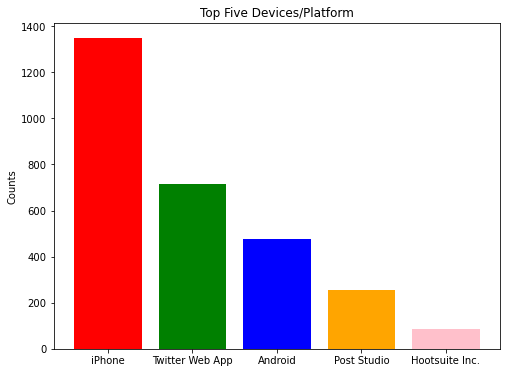

In [58]:
# making a bar plot visualizing the top five devices/platform within the dataset

device = ['iPhone', 'Twitter Web App', 'Android', 'Post Studio', 'Hootsuite Inc.']
count_device = [1348, 715, 477, 256, 87]
colors = ['red', 'green', 'blue', 'orange', "pink"]

# creating the bar plot showcasing top five devices/platform
plt.figure(figsize=(8, 6))
plt.bar(device, count_device, color = colors)
plt.ylabel('Counts')
plt.title('Top Five Devices/Platform')
plt.show()

#### Interpretation:  
it gives a hint into what types of people/organizations are participating in the fast fashion discourse. While the top 3 platforms/devices are very predictable, what is interesting is Post Studio and Hootsuite Inc. Given a simple Google search, I found out that these two platforms are essentially social media management platforms that have features such as auto posting. This tells that many companies and organizations such as news outlets are using these tools to share news or articles pertinent to fast fashion. This could mean that the Twitter discourse could be fairly neutral or evenly spread between each sentiment given that both individuals and organizations are present in the discussion. 

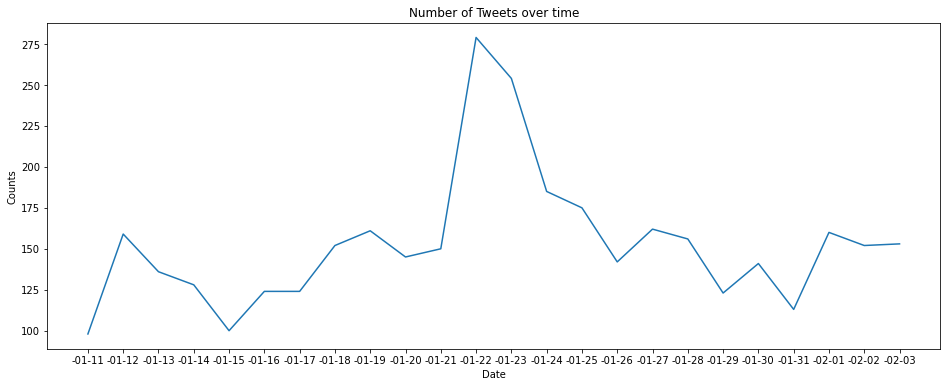

In [59]:
# making a line plot visualizing the number of tweets posted for each day from January 11, 2023, to February 3, 2023. 

# simplify the date to a "Month/Date" version for better interpretation and simplicity of the plot
date_simplified = []
for date in fashion["date"]:
    date_simplified.append(date[4:10])
fashion["date_simplified"] = date_simplified

date = fashion["date_simplified"].unique()
date_1 = date[::-1]

# count the number of tweets posted in each day
counts = fashion.groupby("date_simplified").size()

# create a line plot showcasing number of Tweets over time
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(date_1, counts)
ax.set_xlabel('Date')
ax.set_ylabel('Counts')
ax.set_title('Number of Tweets over time')
plt.show()


#### Interpretation:   
According to the graph, the highest peak in the number of tweets posted in a day is January 22, 2023 – January 23, 2023. Compared to the average of about 150 new tweets a day, January 22 saw 279 new tweets, and January 23 saw 254, which is about a 75% increase from the average. This could potentially show that something important happened in the area of fast fashion during this period which prompted people to share their original thoughts on Twitter. This can include new information or news being released such as a report detailing how much oil waste fast fashion companies produce. Such trends indicate how the discourse of fast fashion has changed over about a month by looking at catalyzing events. 

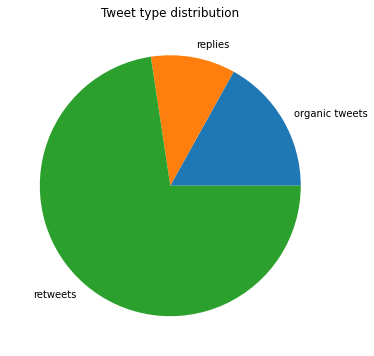

In [96]:
# making a pie plot visualizing the distribution of tweet types (organic tweets, replies, retweets)

# I used the larger dataset for this visualization for a larger sample size
# Calculating the counts of organic tweets, replies, and retweets respectively
fashion_large = pd.read_csv("fastfashion_cleaned_full.csv")
count_reply = 0
for i in fashion_large["inReplyToTweetId"]:
    if not math.isnan(i):
        count_reply += 1
count_organic = 10025 - count_reply
count_retweet = fashion_large["retweetCount"].sum()
tweets_type = ['organic tweets', 'replies', 'retweets']
tweets_type_counts = [count_organic, count_reply, count_retweet]

# creating the pie plot showcasing relative proportions of tweet type
plt.figure(figsize=(8, 6))
plt.pie(tweets_type_counts, labels = tweets_type)
plt.title('Tweet type distribution')
plt.show()

#### Interpretation:  
Majority of the tweets are of the retweet type, whereas organic tweets and replies only constituted low percentages of the data. This suggests that the fast fashion topics are mostly resonating with people in the Twitter community and that they find it valuable enough to share. On the other hand, the low percentage of organic tweets and replies indicate a lack of original content that can spark conversations and engagement among the audiences. Much of the discourse surrounding fast fashion does not consist of individuals voicing their personal opinions.   
  
This finding might provide insights to answer my research question on the dynamics of American attitudes toward the practices of fast fashion. High retweets typically indicate rising awareness, but there isn’t a lot of action being taken, and there are not enough people caring enough to take the time and express their own opinions. Moreover, the same narratives recirculating on Twitter may lead to unoriginal discourse and the spread of misinformation. This can happen in several ways, such as when users retweet or share the same posts without adding their own perspectives or insights or taking the original tweet out of context. Additionally, users may share the same articles, news stories, or opinion pieces, which can lead to a repetitive conversation on a particular topic in fast fashion. It can limit the diversity of perspectives and ideas that are being shared and the potential for new insights or creative solutions to be discovered.

In [97]:
# count and order the frequency of hashtags, showing firt five 

fashion["hashtags"].value_counts()[0:5]

['fashion', 'women', 'men', 'beauty', 'model', 'design', 'art', 'Valentine', 'fallstores']    85
['plussize', 'fashion', 'curves', 'curvy', 'style', 'inspo']                                  35
['fashion', 'women', 'men', 'beauty', 'model', 'design', 'art', 'Christmas', 'fallstores']    22
['streetwear', 'fashion']                                                                     14
['fastfashion']                                                                               13
Name: hashtags, dtype: int64

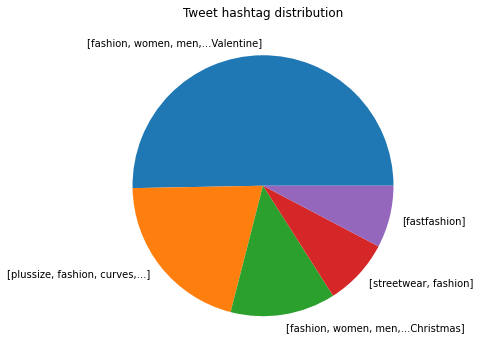

In [98]:
# making a pie plot of the top five frequent hashtags

hashtag_type = ['[fashion, women, men,...Valentine]', '[plussize, fashion, curves,...]', '[fashion, women, men,...Christmas]',
               '[streetwear, fashion]',  '[fastfashion]']
hashtag_type_counts = [85, 35, 22, 14, 13]
plt.figure(figsize=(8, 6))
plt.pie(hashtag_type_counts, labels = hashtag_type)
plt.title('Tweet hashtag distribution')
plt.show()

#### Interpretation:  
By looking at the most frequent hashtags, I observed that the most related topics to fast fashion turned out to be "Valentine," "curves," "streetwear," "beauty," etc.. This provides a clearer picture on how people view and reference to fast fashion, such that there are more references to fast fashion's related festivals, styles, and customers than references to its environmental or ethical issues. However, hashtags cannot completely reflect the content of the tweets themself, since they only provide a convenient reference to certain topics. Therefore, in the next section, I will conduct more in-depth sentiment analysis on the raw content of tweets to obtain more insights.


# SECTION 3: SENTIMENT ANALYSIS & RESULTS

Since the compound score is a numerical value between -1 and 1, where -1 indicates a strongly negative sentiment, 0 indicates a neutral sentiment, and 1 indicates a strongly positive sentiment. Thus, I decided the thresholds of 0.5 and -0.5 for categorizing positive/negative sentiments, and the tweets with compounds between -0.5 and 0.5 will be categorized as neutral. The reason I picked 0.5/-0.5 instead of 0 as the thresholds is to provide a range for the fluctuation of emotion of the relatively neutral tweets. Only relatively polarized sentiments will be categorized into positive/negative.

In [100]:
# creat empty lists to store the compound scores and sentiment type respectively
sentiment = []
sentiment_type = []
analyzer = SentimentIntensityAnalyzer()

# for loop to categorize the tweets according to sentiment
for text in fashion['rawContent']:
    scores = analyzer.polarity_scores(text)
    if scores['compound'] > 0.5:
        sentiment_type.append("positive")
    elif scores['compound'] < -0.5:
        sentiment_type.append("negative")
    else:
        sentiment_type.append("neutral")     
    sentiment.append(scores['compound'])
    
# add new variables into the dataset
fashion['compound'] = sentiment
fashion['sentiment'] = sentiment_type

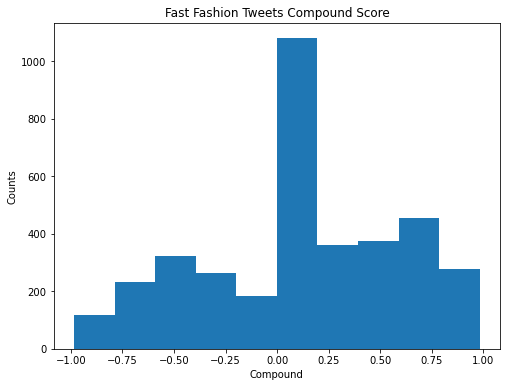

In [101]:
# making a histogram visualizing the distribution of compound scores
plt.figure(figsize=(8, 6))
fashion['compound'].plot(kind = "hist")
plt.xlabel('Compound')
plt.ylabel('Counts')
plt.title('Fast Fashion Tweets Compound Score')
plt.show()

#### Interpretation:  

From the plot, the majority of the sentiment centered between 0 and 0.15, implying that most neutral tweets are slightly skewed towards positive. There are more positive tweets than negative at all scales, while the sentiments are slightly polarized around the thresholds. 

In [102]:
# count and order the sentiment categories

fashion['sentiment'].value_counts()

neutral     2265
positive     888
negative     519
Name: sentiment, dtype: int64

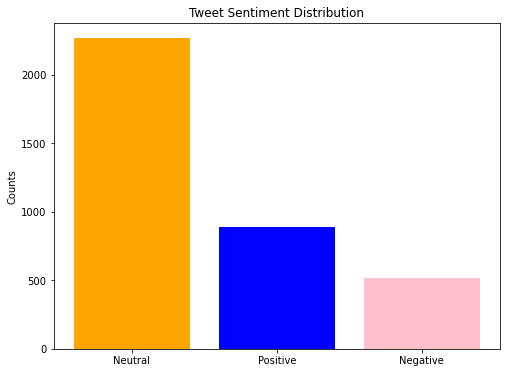

In [149]:
# making a bar plot visualizing tweet sentiment categories' distribution

sentiment = ['Neutral', 'Positive', 'Negative']
sentiment_count = [2265, 888, 519]
colors = ['orange', 'blue', "pink"]

plt.figure(figsize=(8, 6))
plt.bar(sentiment, sentiment_count, color = colors)
plt.ylabel('Counts')
plt.title('Tweet Sentiment Distribution')
plt.show()

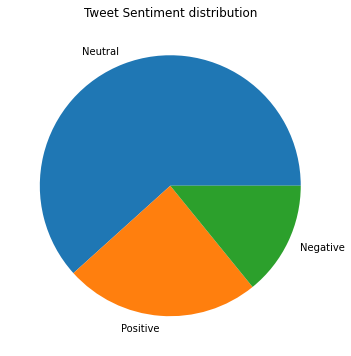

In [156]:
# making a pie plot visualizing tweet sentiment categories proportions

plt.figure(figsize=(8, 6))
plt.pie(sentiment_count, labels = sentiment)
plt.title('Tweet Sentiment distribution')
plt.show()

#### Interpretation  
From both the bar chart and the pie chart, we can see that there are more positive tweets than negative tweets toward fast fashion, and the number of neutral-sentiment tweets is the highest. This is against my initial belief such that the predominant sentiment will be negative due to the primary discourse surrounding the criticism on fast fashion's environmental degradation and waste. Therefore, it will be interesting to investigate deeper into the tweets' words to see what the discourse and details surrounding the advocacy concerning fast fashion are. 

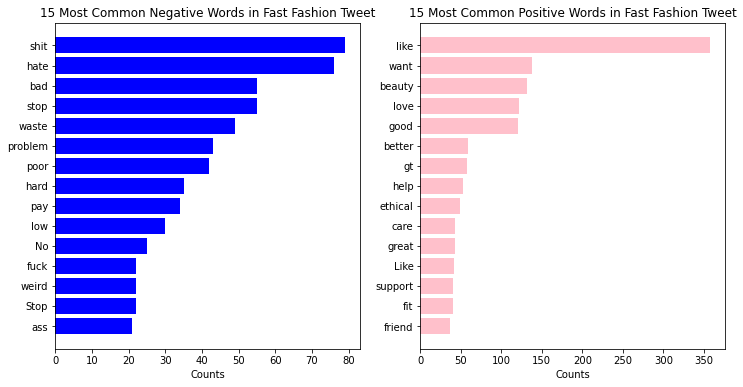

In [103]:
# create empty lists storing all positive and negative words appearing in all tweets
positive_words = []
negative_words = []

stop_words = stopwords.words('english')

# tokenize all the words in each tweet 
# add them into positive/negative word lists according to their compound scores
for text in fashion['rawContent']:
    for word in word_tokenize(text):
        score = analyzer.polarity_scores(word)['compound']
        if score > 0:
            positive_words.append(word)
        elif score < 0:
            negative_words.append(word)

# remove stop words 
negative_words_nostop = [word for word in negative_words if word not in stop_words]
positive_words_nostop = [word for word in positive_words if word not in stop_words]

# store the frequencies of positive/negative words
negative_words_fd_nostop = FreqDist(negative_words_nostop)
positive_words_fd_nostop = FreqDist(positive_words_nostop)

# obtain the top 15 most frequent positive/negative words
most_common_negative_nostop = negative_words_fd_nostop.most_common(15)
most_common_positive_nostop = positive_words_fd_nostop.most_common(15)


# make two bar plots visualizing the top 15 most frequent positive/negative words (stop words removed)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax2.barh([word for (word, count) in most_common_positive_nostop], [count for (word, count) in most_common_positive_nostop], color='pink')
ax2.set_title('15 Most Common Positive Words in Fast Fashion Tweet')
ax2.set_xlabel("Counts")
ax2.invert_yaxis()

ax1.barh([word for (word, count) in most_common_negative_nostop], [count for (word, count) in most_common_negative_nostop], color='blue')
ax1.set_title('15 Most Common Negative Words in Fast Fashion Tweet')
ax1.set_xlabel("Counts")
ax1.invert_yaxis()

plt.show() 


#### Interpretation:  
This plot provides a more detailed observation on the fast fashion tweets' content. In the positive word list, the occurrence of words "beauty," "fit," and "friend" complies with the results of hashtag plot aforementioned, which showed that fast fashion discussions are frequently referenced to aesthetic, cloth genres, and festivals. In the negative word list, there are negative words with very bad connotation such as "sh*t", and "a*s", signifying that people posting negative tweets expressed really extreme hatred within the fast fashion discussion. Importantly, the words 'waste" and "problem" in the negative word list and the word "ethical" in the positive word list both indicate that fast fashion topics pertinent to environmental and ethical issues have been frequently discussed, while the words "poor" and "pay" reflect people's attitudes towards fast fashion prices and consumption habits.  
  
These results give insight into my first research question, which aims to explore what people talk about when they discuss fast fashion on Twitter. After looking through the tweets, there is a decent number of people talking about how they’re angry, disgusted, and sad with many fast fashion practices, and some are even afraid of how these brands could be harmful. On the other hand, there are a decent number of tweets that express joy, anticipation, and trust, specifically when referring to recently purchased products or wanting to buy something from certain fast fashion brands. In doing so, people feel anticipation when buying and waiting for a product and joy when they receive the product and wear it for the first time. Thus, the distribution of emotions shows that Twitter discourse around fast fashion is mostly positive and full of anticipation. Many users are voicing their excitement over recently bought clothes or taking fast fashion with a positive twist, such as offering sustainable alternatives or recommending thrifting and re-wearing fast fashion garments to extend their lifespan. It could also mean that much of the discourse on Twitter is actually brands advertising their clothing sales and promotions. On the other hand, negative tweets that are full of criticism or anger at the fast fashion industry are underrepresented in Twitter discourse. These tweets are often extremely critical and repeat the same concerns, such as those advocating for more environmentalism and less consumerist behaviors.   

# SECTION 4: DISCUSSION

The world is increasingly forced to confront many of the repercussions of human-made decisions, one of which is climate change. American society and culture have contributed to the popularity of fast fashion among consumers who are prone to spending and consuming in excess to keep up with trends. On one hand, corporations exploit human psychological needs to fit in for financial gain. Due to the shortage of craftspeople and manufacturing in the United States, consumers have less awareness about what garments are worth and have become accustomed to inexpensive costs for goods. Consumers neglect to consider the environmental and labor costs associated with mass-produced clothing.  
  
In the article “Hooking Kids on Fast Fashion,” the author discusses her experience in addressing her child’s desire for fast fashion. The article highlights the negative impact of fast fashion on the environment, labor rights, and consumer culture and how these issues can be difficult to explain to a child who is excited about the latest trends and styles. Many fast fashion brands utilize social media and influencers to reach a wide audience. Among them, children are the most developmentally vulnerable to fitting in with the crowd and gaining social wealth by appearing trendy and fashionable. They also lack a lot of self-regulation when deciding to purchase things for themselves. Therefore, addressing fast fashion with children is one of the challenges pertinent to its influence on American culture, capitalism, and environmentalism. This highlights the importance of promoting sustainable and ethical consumption habits among children and youth and the potential role of social media in facilitating this change. While the high percentage of retweets in the dataset suggests that there is an audience for content related to fast fashion, it also highlights the potential for brands to manipulate this discourse and influence attitudes toward consumption. Therefore, there is a need for more organic discussion promoting sustainable and ethical consumption habits, which can provide a counter-narrative to the dominant discourse around fast fashion and encourage more critical thinking among young consumers. By raising awareness and promoting alternative perspectives, social media discourse can play an important role in shaping attitudes toward consumption and promoting more sustainable and ethical practices.  
  
The significance of this research on the Twitter discourse regarding fast fashion is that it highlights the impact that the industry has on both individuals and our environment. It aims to inform readers both on the positive and the negative consequences of fast fashion’s surge in popularity within our culture, as well as the repercussions of supporting fast fashion. In this age of TikTok hauls with hundreds of dollars worth of clothing and accessories, I want to encourage people to consume more responsibly and with an awareness of what fast fashion perpetuates in society. I hope that through this analysis of the Twitter discourse surrounding fast fashion, consumers will think more critically about their purchasing habits and decisions. Fast fashion is an industry that facilitates textile waste, pollutes the environment with its synthetic garments, and takes advantage of outsourced labor, yet it is also an industry that seems irrepressible. What we want to emphasize is that this phenomenon is more than just a cultural issue; it is a humanitarian one that affects everyone. While this project is not meant to analyze fast fashion as a whole but rather its discourse on Twitter, we hope that the social media data and sentiment analysis will better inform active players in the fast fashion real such as clothing brands. Through this revelation of sentiments and discourse, we hope to bridge the understanding of fast fashion from multiple perspectives.
